In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import Quine_McCluskey_Functions as qm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv("DFF_result.csv")

# Clean data.

# Pulse width values for Pass cases & Current percentage values for Fail cases. 
df.loc[df['fail'] == 'pass', 'Junction Values'] = df.loc[df['fail'] == 'pass', 'Pulse width info']
df.loc[df['fail'] == 'fail', 'Junction Values'] = df.loc[df['fail'] == 'fail', 'Current percentage']


# One-hot encode pass/fail.
drop_col = ['cus', 'real_flux', 'Faulty Junction', 'Pulse magnitude info', 'Phase state info', 'Pulse width info', 'Current percentage' , 'real_output', 'gold_output', 'pattern', 'MC']
df = df.drop(drop_col, axis=1)

# df.head()

In [5]:
for index, row in df.iterrows():
    val = eval(str(row['Junction Values']))
    df.at[index, 'B01RX1'] = val['B01RX1']
    df.at[index, 'B4'] = val['B4']
    if .59 <= val['B01RX1'] <= .97:
        df.at[index, 'Rule 1'] = 1
    else: 
        df.at[index, 'Rule 1'] = 0
    if .41 <= val['B4'] <= .63:
        df.at[index, 'Rule 2'] = 1
    else: 
        df.at[index, 'Rule 2'] = 0


columns = df.columns.tolist()
df["fail"] = df["fail"].replace({"pass": 1, "fail": 0})
df = df[columns]

df


,config,fail,Junction Values,B01RX1,B4,Rule 1,Rule 2
0,and_spb_0_dff_spa_0_and,1,"{'B01RX1': 0.83, 'B01RX2': 0.72, 'B01TX1': 0.6...",0.83,0.57,1.0,1.0
1,and_spb_0_dff_spa_0_and,0,"{'B01RX1': 0.85, 'B01RX2': 0.73, 'B01TX1': 0.7...",0.85,0.58,1.0,1.0
2,and_spb_0_dff_spa_0_and,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",0.79,0.54,1.0,1.0
3,and_spb_0_dff_spa_0_and,1,"{'B01RX1': 0.75, 'B01RX2': 0.66, 'B01TX1': 0.6...",0.75,0.51,1.0,1.0
4,and_spb_0_dff_spa_0_and,1,"{'B01RX1': 0.77, 'B01RX2': 0.67, 'B01TX1': 0.6...",0.77,0.53,1.0,1.0
...,...,...,...,...,...,...,...
39996,xor_spb_3_dff_spa_3_xor,0,"{'B01RX1': 0.64, 'B01RX2': 0.58, 'B01TX1': 0.5...",0.64,0.44,1.0,1.0
39997,xor_spb_3_dff_spa_3_xor,0,"{'B01RX1': 0.64, 'B01RX2': 0.58, 'B01TX1': 0.5...",0.64,0.44,1.0,1.0
39998,xor_spb_3_dff_spa_3_xor,0,"{'B01RX1': 0.64, 'B01RX2': 0.58, 'B01TX1': 0.5...",0.64,0.44,1.0,1.0
39999,xor_spb_3_dff_spa_3_xor,0,"{'B01RX1': 0.61, 'B01RX2': 0.56, 'B01TX1': 0.5...",0.61,0.42,1.0,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


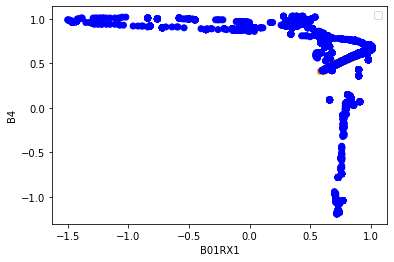

In [9]:
plt.scatter(df['B01RX1'], df['B4'], c=['orange' if p else 'blue' for p in df['fail']], marker='o')
plt.xlabel('B01RX1')
plt.ylabel('B4')
plt.legend()


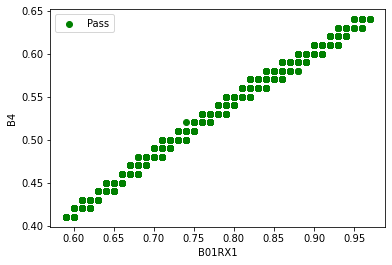

In [10]:
pass_data = df[df['fail'] == 1]
plt.scatter(pass_data['B01RX1'], pass_data['B4'], c='green', label='Pass', marker='o')
plt.xlabel('B01RX1')
plt.ylabel('B4')
plt.legend()



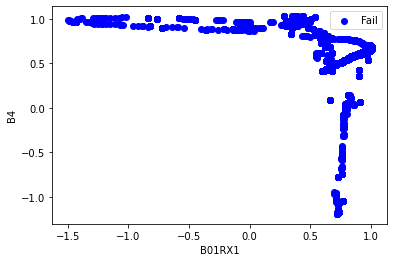

In [11]:
fail_data = df[df['fail'] == 0]
plt.scatter(fail_data['B01RX1'], fail_data['B4'], c='blue', label='Fail', marker='o')
plt.xlabel('B01RX1')
plt.ylabel('B4')
plt.legend()


Best Hyperparameters: {'C': 10.0, 'solver': 'liblinear'}
Accuracy on Test Data: 0.7332833395825522
Model Coefficients: [-0.85546636 -4.18847759]


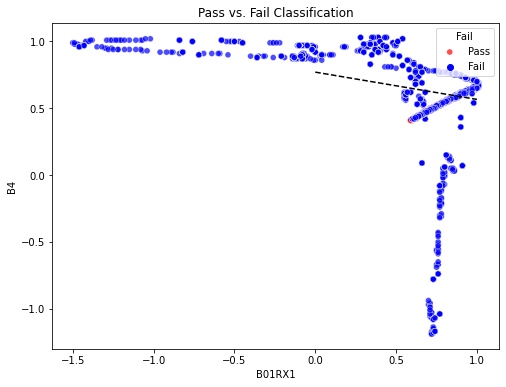

In [14]:
y = df['fail']
X = df[['B01RX1', 'B4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga']  # Solver algorithms
}

model = LogisticRegression()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Data: {accuracy}")

coefficients = best_model.coef_[0] # CHANGE MODEL TO BEST MODEL AFTER THIS LINE
print("Model Coefficients:", coefficients)

# Plot the decision boundary (optional)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['B01RX1'], y=df['B4'], hue=df['fail'], data=df, palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title("Pass vs. Fail Classification")
plt.xlabel('B01RX1')
plt.ylabel('B4')

# Plot the decision boundary (line) based on the model coefficients
x_values = np.linspace(0, 1, 100)
y_values = -(coefficients[0] * x_values + best_model.intercept_[0]) / coefficients[1]
# plt.plot(x_values, y_values, color='black', linestyle='dashed', label='Decision Boundary')

plt.legend(title='Fail', loc='upper right', labels=['Pass', 'Fail'])
plt.show()


# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(report)


In [9]:
# Create buckets.
condition0 = (df[['Rule 1', 'Rule 2', 'fail']] == [0, 0, 0]).all(axis=1)
condition0_df = df[condition0]
print(len(condition0_df))

condition1 = (df[['Rule 1', 'Rule 2', 'fail']] == [0, 0, 1]).all(axis=1)
condition1_df = df[condition1]
print(len(condition1_df))

condition2 = (df[['Rule 1', 'Rule 2', 'fail']] == [0, 1, 0]).all(axis=1)
condition2_df = df[condition2]
print(len(condition2_df))

condition3 = (df[['Rule 1', 'Rule 2', 'fail']] == [0, 1, 1]).all(axis=1)
condition3_df = df[condition3]
print(len(condition3_df))

condition4 = (df[['Rule 1', 'Rule 2', 'fail']] == [1, 0, 0]).all(axis=1)
condition4_df = df[condition4]
print(len(condition4_df))

condition5 = (df[['Rule 1', 'Rule 2', 'fail']] == [1, 0, 1]).all(axis=1)
condition5_df = df[condition5]
print(len(condition5_df))

condition6 = (df[['Rule 1', 'Rule 2', 'fail']] == [1, 1, 0]).all(axis=1)
condition6_df = df[condition6]
print(len(condition6_df))

condition7 = (df[['Rule 1', 'Rule 2', 'fail']] == [1, 1, 1]).all(axis=1)
condition7_df = df[condition7]
print(len(condition7_df))

2016
0
100
0
1456
25
13141
23263


In [30]:
condition0_df['driver'] = condition0_df['config'].str.split('_').str[0]
condition0_df['load'] = condition0_df['config'].str.split('_').str[6]
condition0_df['splitterNum'] = condition0_df['config'].str.split('_').str[2]

condition0_df= pd.get_dummies(condition0_df, columns = ["driver", "load", "splitterNum"])

# condition0_df.head(20)

truthTable_0 = condition0_df[condition0_df.columns[-14:]]
# truthTable_0

minterms_0= []
for row in truthTable_0.values:
    binary = "".join(map(str, row))
    minterms_0.append(binary)

minterms_0= list(set(minterms_0))
minterms_0.sort()
# print (len(minterms_0))
prime_implicants = qm.check(minterms_0)
# print("Prime Implicants are:")
# print(prime_implicants)
chart = qm.prime_implicant_chart(prime_implicants, minterms_0)

essential_prime_implicants = qm.selection(chart, prime_implicants)
print("Essential Prime Implicants are:")
print(essential_prime_implicants)
print(len(essential_prime_implicants))

C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\3951879389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition0_df['driver'] = condition0_df['config'].str.split('_').str[0]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\3951879389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition0_df['load'] = condition0_df['config'].str.split('_').str[6]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\3951879389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

Essential Prime Implicants are:
['00001000010001', '00001000010010', '00001000010100', '00001000011000', '00001000100001', '00001000100010', '00001000100100', '00001000101000', '00001001000001', '00001001000010', '00001001000100', '00001001001000', '00001010000001', '00001010000010', '00001010000100', '00001010001000', '00001100000001', '00001100000010', '00001100000100', '00001100001000', '00010000010001', '00010000010010', '00010000010100', '00010000011000', '00010000100001', '00010000100010', '00010000100100', '00010000101000', '00010001000001', '00010001000010', '00010001000100', '00010001001000', '00010010000001', '00010010000010', '00010010000100', '00010010001000', '00010100000001', '00010100000010', '00010100000100', '00010100001000', '00100000010001', '00100000010010', '00100000010100', '00100000011000', '00100000100001', '00100000100010', '00100000100100', '00100000101000', '00100001000001', '00100001000010', '00100001000100', '00100001001000', '00100010000001', '001000100000

In [31]:
condition1_df['driver'] = condition1_df['config'].str.split('_').str[0]
condition1_df['load'] = condition1_df['config'].str.split('_').str[6]
condition1_df['splitterNum'] = condition1_df['config'].str.split('_').str[2]

condition1_df= pd.get_dummies(condition1_df, columns = ["driver", "load", "splitterNum"])

condition1_df.head(20)

truthTable_1 = condition1_df[condition1_df.columns[-13:]]
# truthTable_1

minterms_1 = []
for row in truthTable_1.values:
    binary = "".join(map(str, row))
    minterms_1.append(binary)

minterms_1 = list(set(minterms_1))
minterms_1.sort()
# print (len(minterms_1))
prime_implicants = qm.check(minterms_1)
# print("Prime Implicants are:")
# print(prime_implicants)
chart = qm.prime_implicant_chart(prime_implicants, minterms_1)

essential_prime_implicants = qm.selection(chart, prime_implicants)
print("Essential Prime Implicants are:")
print(essential_prime_implicants)
print(len(essential_prime_implicants))


C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\3408580070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition1_df['driver'] = condition1_df['config'].str.split('_').str[0]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\3408580070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition1_df['load'] = condition1_df['config'].str.split('_').str[6]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\3408580070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

Essential Prime Implicants are:
['0000100001001', '0000100001010', '0000100001100', '0000100010001', '0000100010010', '0000100010100', '0000100100001', '0000100100010', '0000100100100', '0000101000001', '0000101000010', '0000101000100', '0000110000001', '0000110000010', '0000110000100', '0001000001001', '0001000001010', '0001000001100', '0001000010001', '0001000010010', '0001000010100', '0001000100001', '0001000100010', '0001000100100', '0001001000001', '0001001000010', '0001001000100', '0001010000001', '0001010000010', '0001010000100', '0010000001001', '0010000001010', '0010000001100', '0010000010001', '0010000010010', '0010000010100', '0010000100001', '0010000100010', '0010000100100', '0010001000001', '0010001000010', '0010001000100', '0010010000001', '0010010000010', '0010010000100', '0100000001001', '0100000001010', '0100000001100', '0100000010001', '0100000010010', '0100000010100', '0100000100001', '0100000100010', '0100000100100', '0100001000001', '0100001000010', '0100001000100'

In [32]:
condition2_df['driver'] = condition2_df['config'].str.split('_').str[0]
condition2_df['load'] = condition2_df['config'].str.split('_').str[6]
condition2_df['splitterNum'] = condition2_df['config'].str.split('_').str[2]

condition2_df= pd.get_dummies(condition2_df, columns = ["driver", "load", "splitterNum"])

# condition2_df.head(20)

truthTable_2 = condition2_df[condition2_df.columns[-13:]]
# truthTable_2

minterms_2 = []
for row in truthTable_2.values:
    binary = "".join(map(str, row))
    minterms_2.append(binary)

minterms_2 = list(set(minterms_2))
minterms_2.sort()
# print (len(minterms_2))
prime_implicants = qm.check(minterms_2)
# print("Prime Implicants are:")
# print(prime_implicants)
chart = qm.prime_implicant_chart(prime_implicants, minterms_2)

essential_prime_implicants = qm.selection(chart, prime_implicants)
print("Essential Prime Implicants are:")
print(essential_prime_implicants)
print(len(essential_prime_implicants))


Essential Prime Implicants are:
['0000100001001', '0000100001010', '0000100001100', '0000100010001', '0000100010010', '0000100010100', '0000100100001', '0000100100010', '0000100100100', '0000101000001', '0000101000010', '0000101000100', '0000110000001', '0000110000010', '0000110000100', '0001000001001', '0001000001010', '0001000001100', '0001000010001', '0001000010010', '0001000010100', '0001000100001', '0001000100010', '0001000100100', '0001001000001', '0001001000010', '0001001000100', '0001010000001', '0001010000010', '0001010000100', '0010000001001', '0010000001010', '0010000001100', '0010000010001', '0010000010010', '0010000010100', '0010000100001', '0010000100010', '0010000100100', '0010001000001', '0010001000010', '0010001000100', '0010010000001', '0010010000010', '0010010000100', '0100000001001', '0100000001010', '0100000001100', '0100000010001', '0100000010010', '0100000010100', '0100000100001', '0100000100010', '0100000100100', '0100001000001', '0100001000010', '0100001000100'

C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\304457750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition2_df['driver'] = condition2_df['config'].str.split('_').str[0]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\304457750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition2_df['load'] = condition2_df['config'].str.split('_').str[6]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\304457750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [33]:
condition3_df['driver'] = condition3_df['config'].str.split('_').str[0]
condition3_df['load'] = condition3_df['config'].str.split('_').str[6]
condition3_df['splitterNum'] = condition3_df['config'].str.split('_').str[2]

condition3_df= pd.get_dummies(condition3_df, columns = ["driver", "load", "splitterNum"])

truthTable_3 = condition3_df[condition3_df.columns[-13:]]
# truthTable_3

minterms_3 = []
for row in truthTable_3.values:
    binary = "".join(map(str, row))
    minterms_3.append(binary)

minterms_3 = list(set(minterms_3))
minterms_3.sort()
# print (len(minterms_3))
prime_implicants = qm.check(minterms_3)
# print("Prime Implicants are:")
# print(prime_implicants)
chart = qm.prime_implicant_chart(prime_implicants, minterms_3)

essential_prime_implicants = qm.selection(chart, prime_implicants)
print("Essential Prime Implicants are:")
print(essential_prime_implicants)
print(len(essential_prime_implicants))

# condition3_df.head(20)
# qm.convertBack(essential_prime_implicants)

C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\4234231922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition3_df['driver'] = condition3_df['config'].str.split('_').str[0]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\4234231922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition3_df['load'] = condition3_df['config'].str.split('_').str[6]


Essential Prime Implicants are:
['0000100001001', '0000100001010', '0000100010001', '0000100010010', '0000100100001', '0000100100010', '0000101000001', '0000101000010', '0000110000001', '0000110000010', '0001000001001', '0001000001010', '0001000001100', '0001000010001', '0001000010010', '0001000010100', '0001000100001', '0001000100010', '0001000100100', '0001001000001', '0001001000010', '0001001000100', '0001010000001', '0001010000010', '0001010000100', '0010000001001', '0010000001010', '0010000001100', '0010000010001', '0010000010010', '0010000010100', '0010000100001', '0010000100010', '0010000100100', '0010001000001', '0010001000010', '0010001000100', '0010010000001', '0010010000010', '0010010000100', '0100000001001', '0100000001010', '0100000010001', '0100000010010', '0100000100001', '0100000100010', '0100001000001', '0100001000010', '0100010000001', '0100010000010', '1000000001001', '1000000001010', '1000000001100', '1000000010001', '1000000010010', '1000000010100', '1000000100001'

C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\4234231922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition3_df['splitterNum'] = condition3_df['config'].str.split('_').str[2]


In [34]:
condition4_df['driver'] = condition4_df['config'].str.split('_').str[0]
condition4_df['load'] = condition4_df['config'].str.split('_').str[6]
condition4_df['splitterNum'] = condition4_df['config'].str.split('_').str[2]

condition4_df= pd.get_dummies(condition4_df, columns = ["driver", "load", "splitterNum"])

# condition4_df.head(20)

truthTable_4 = condition4_df[condition4_df.columns[-14:]]
# truthTable_4

minterms_4 = []
for row in truthTable_4.values:
    binary = "".join(map(str, row))
    minterms_4.append(binary)

minterms_4 = list(set(minterms_4))
minterms_4.sort()
# print (len(minterms_4))
prime_implicants = qm.check(minterms_4)
# print("Prime Implicants are:")
# print(prime_implicants)
chart = qm.prime_implicant_chart(prime_implicants, minterms_4)

essential_prime_implicants = qm.selection(chart, prime_implicants)
print("Essential Prime Implicants are:")
print(essential_prime_implicants)
print(len(essential_prime_implicants))



C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\1319267781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition4_df['driver'] = condition4_df['config'].str.split('_').str[0]


C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\1319267781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition4_df['load'] = condition4_df['config'].str.split('_').str[6]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\1319267781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition4_df['splitterNum'] = condition4_df['config'].str.split('_').str[2]


Essential Prime Implicants are:
['00001000010001', '00001000010010', '00001000010100', '00001000011000', '00001000100001', '00001000100010', '00001000100100', '00001000101000', '00001001000001', '00001001000010', '00001001000100', '00001001001000', '00001010000001', '00001010000010', '00001010000100', '00001010001000', '00001100000001', '00001100000010', '00001100000100', '00001100001000', '00010000010001', '00010000010010', '00010000010100', '00010000011000', '00010000100001', '00010000100010', '00010000100100', '00010000101000', '00010001000001', '00010001000010', '00010001000100', '00010001001000', '00010010000001', '00010010000010', '00010010000100', '00010010001000', '00010100000001', '00010100000010', '00010100000100', '00010100001000', '00100000010001', '00100000010010', '00100000010100', '00100000011000', '00100000100001', '00100000100010', '00100000100100', '00100000101000', '00100001000001', '00100001000010', '00100001000100', '00100001001000', '00100010000001', '001000100000

In [35]:
condition5_df['driver'] = condition5_df['config'].str.split('_').str[0]
condition5_df['load'] = condition5_df['config'].str.split('_').str[6]
condition5_df['splitterNum'] = condition5_df['config'].str.split('_').str[2]

condition5_df= pd.get_dummies(condition5_df, columns = ["driver", "load", "splitterNum"])

condition5_df.head(20)

# truthTable_5 = condition5_df[condition5_df.columns[-13:]]
# # truthTable_5

# minterms_5 = []
# for row in truthTable_5.values:
#     binary = "".join(map(str, row))
#     minterms_5.append(binary)

# minterms_5 = list(set(minterms_5))
# minterms_5.sort()
# # print (len(minterms_5))
# prime_implicants = qm.check(minterms_5)
# # print("Prime Implicants are:")
# # print(prime_implicants)
# chart = qm.prime_implicant_chart(prime_implicants, minterms_5)

# essential_prime_implicants = qm.selection(chart, prime_implicants)
# print("Essential Prime Implicants are:")
# print(essential_prime_implicants)
# print(len(essential_prime_implicants))



C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\1667928308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition5_df['driver'] = condition5_df['config'].str.split('_').str[0]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\1667928308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition5_df['load'] = condition5_df['config'].str.split('_').str[6]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_12984\1667928308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

,config,fail,Junction Values,Rule 1,Rule 2,driver_and,driver_dff,driver_inv,driver_or,driver_xor,load_and,load_dff,load_inv,load_or,load_xor,splitterNum_2
4232,and_spb_2_dff_spa_2_and,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",1.0,0.0,1,0,0,0,0,1,0,0,0,0,1
4632,and_spb_2_dff_spa_2_dff,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",1.0,0.0,1,0,0,0,0,0,1,0,0,0,1
5032,and_spb_2_dff_spa_2_inv,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",1.0,0.0,1,0,0,0,0,0,0,1,0,0,1
5432,and_spb_2_dff_spa_2_or,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",1.0,0.0,1,0,0,0,0,0,0,0,1,0,1
5832,and_spb_2_dff_spa_2_xor,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",1.0,0.0,1,0,0,0,0,0,0,0,0,1,1
12232,dff_spb_2_dff_spa_2_and,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",1.0,0.0,0,1,0,0,0,1,0,0,0,0,1
12632,dff_spb_2_dff_spa_2_dff,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",1.0,0.0,0,1,0,0,0,0,1,0,0,0,1
13032,dff_spb_2_dff_spa_2_inv,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",1.0,0.0,0,1,0,0,0,0,0,1,0,0,1
13432,dff_spb_2_dff_spa_2_or,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",1.0,0.0,0,1,0,0,0,0,0,0,1,0,1
13832,dff_spb_2_dff_spa_2_xor,1,"{'B01RX1': 0.79, 'B01RX2': 0.69, 'B01TX1': 0.6...",1.0,0.0,0,1,0,0,0,0,0,0,0,1,1


In [10]:
condition6_df['driver'] = condition6_df['config'].str.split('_').str[0]
condition6_df['load'] = condition6_df['config'].str.split('_').str[6]
condition6_df['splitterNum'] = condition6_df['config'].str.split('_').str[2]

condition6_df= pd.get_dummies(condition6_df, columns = ["driver", "load", "splitterNum"])

# condition6_df.head(20)

truthTable_6 = condition6_df[condition6_df.columns[-14:]]
# truthTable_6

minterms_6 = []
for row in truthTable_6.values:
    binary = "".join(map(str, row))
    minterms_6.append(binary)

minterms_6 = list(set(minterms_6))
minterms_6.sort()
# print (len(minterms_6))
prime_implicants = qm.check(minterms_6)
# print("Prime Implicants are:")
# print(prime_implicants)
chart = qm.prime_implicant_chart(prime_implicants, minterms_6)

essential_prime_implicants = qm.selection(chart, prime_implicants)
print("Essential Prime Implicants are:")
print(essential_prime_implicants)
print(len(essential_prime_implicants))

# truthTable_6.head()



C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_10364\2365983672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition6_df['driver'] = condition6_df['config'].str.split('_').str[0]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_10364\2365983672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition6_df['load'] = condition6_df['config'].str.split('_').str[6]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_10364\2365983672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

Essential Prime Implicants are:
['00001000010001', '00001000010010', '00001000010100', '00001000011000', '00001000100001', '00001000100010', '00001000100100', '00001000101000', '00001001000001', '00001001000010', '00001001000100', '00001001001000', '00001010000001', '00001010000010', '00001010000100', '00001010001000', '00001100000001', '00001100000010', '00001100000100', '00001100001000', '00010000010001', '00010000010010', '00010000010100', '00010000011000', '00010000100001', '00010000100010', '00010000100100', '00010000101000', '00010001000001', '00010001000010', '00010001000100', '00010001001000', '00010010000001', '00010010000010', '00010010000100', '00010010001000', '00010100000001', '00010100000010', '00010100000100', '00010100001000', '00100000010001', '00100000010010', '00100000010100', '00100000011000', '00100000100001', '00100000100010', '00100000100100', '00100000101000', '00100001000001', '00100001000010', '00100001000100', '00100001001000', '00100010000001', '001000100000

In [11]:
condition7_df['driver'] = condition7_df['config'].str.split('_').str[0]
condition7_df['load'] = condition7_df['config'].str.split('_').str[6]
condition7_df['splitterNum'] = condition7_df['config'].str.split('_').str[2]


condition7_df= pd.get_dummies(condition7_df, columns = ["driver", "load", "splitterNum"])

# condition7_df.head(20)

truthTable_7 = condition7_df[condition7_df.columns[-13:]]
truthTable_7

minterms_7 = []
for row in truthTable_7.values:
    binary = "".join(map(str, row))
    minterms_7.append(binary)

minterms_7 = list(set(minterms_7))
minterms_7.sort()
print(len(minterms_7))

# no_of_variable = 13
prime_implicants = qm.check(minterms_7)
# print("Prime Implicants are:")
# print(prime_implicants)
chart = qm.prime_implicant_chart(prime_implicants, minterms_7)

essential_prime_implicants = qm.selection(chart, prime_implicants)
print("Essential Prime Implicants are:")
print(essential_prime_implicants)
print(len(essential_prime_implicants))

# truthTable_7.head()
# condition7_df.head()



C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_10364\1627379747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition7_df['driver'] = condition7_df['config'].str.split('_').str[0]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_10364\1627379747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition7_df['load'] = condition7_df['config'].str.split('_').str[6]
C:\Users\Carrie Lei\AppData\Local\Temp\ipykernel_10364\1627379747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

75
Essential Prime Implicants are:
['0000100001001', '0000100001010', '0000100001100', '0000100010001', '0000100010010', '0000100010100', '0000100100001', '0000100100010', '0000100100100', '0000101000001', '0000101000010', '0000101000100', '0000110000001', '0000110000010', '0000110000100', '0001000001001', '0001000001010', '0001000001100', '0001000010001', '0001000010010', '0001000010100', '0001000100001', '0001000100010', '0001000100100', '0001001000001', '0001001000010', '0001001000100', '0001010000001', '0001010000010', '0001010000100', '0010000001001', '0010000001010', '0010000001100', '0010000010001', '0010000010010', '0010000010100', '0010000100001', '0010000100010', '0010000100100', '0010001000001', '0010001000010', '0010001000100', '0010010000001', '0010010000010', '0010010000100', '0100000001001', '0100000001010', '0100000001100', '0100000010001', '0100000010010', '0100000010100', '0100000100001', '0100000100010', '0100000100100', '0100001000001', '0100001000010', '01000010001